In [73]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [74]:
from sklearn.datasets import load_boston
import pandas as pd

In [75]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [76]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


###### Описание данных:        
- CRIM     per capita crime rate by town
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per 10,000 USD
- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

######  Построим матрицу корреляций, чтобы оценить влияние параметров на конечную стоимость и друг на друга 

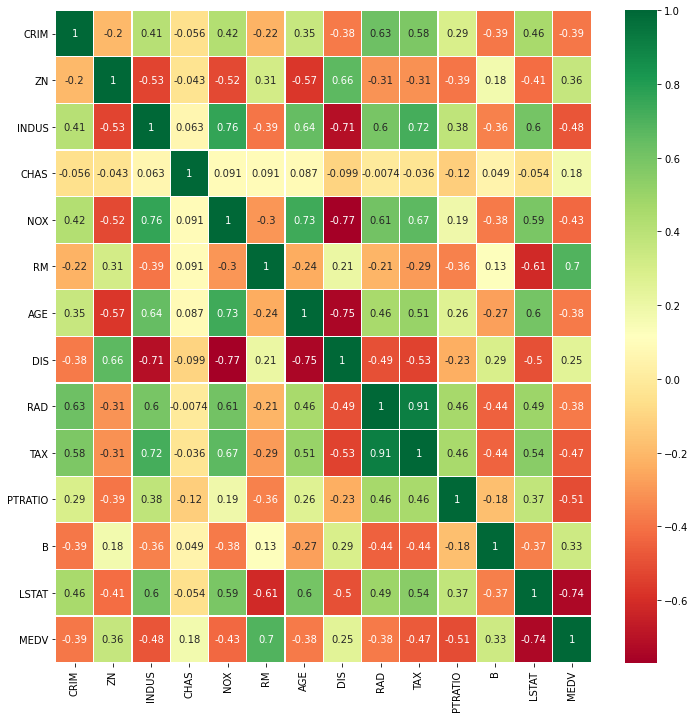

In [77]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

###### На основе анализа корреляций можно выделить две группы параметров:
1. Относительно независимые друг от друга параметры (нет корреляций более 0.7):
- CRIM
- ZN
- CHAS
- RM
- PTRATIO
- B
- LSTAT
2. Тесно связанные друг с другом параметры (есть корреляции более 0.7)
- INDUS
- NOX
- AGE
- DIS
- RAD
- TAX

В целом первая группа параметров должна стать основой для моделирования, а из второй группы необходимо
выбрать только некоторые параметры, которые будут добавлять максимум полезной информации


###### Дополнительно проверим все данные на предмет выбросов
###### 1. Параметр CRIM

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM'>

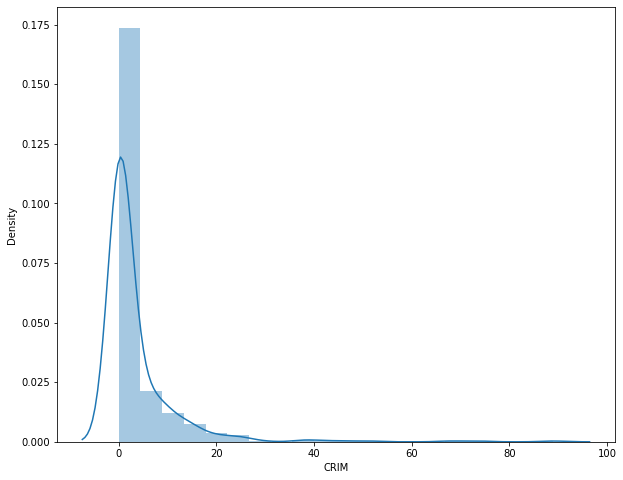

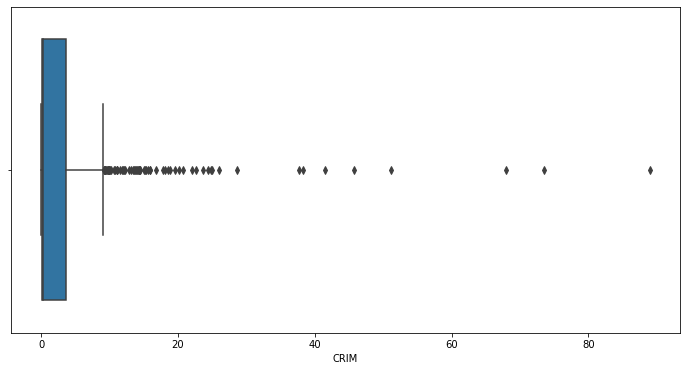

In [78]:
plt.figure(figsize=(10, 8))
sns.distplot(data['CRIM'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['CRIM'])

###### Параметр ZN

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZN'>

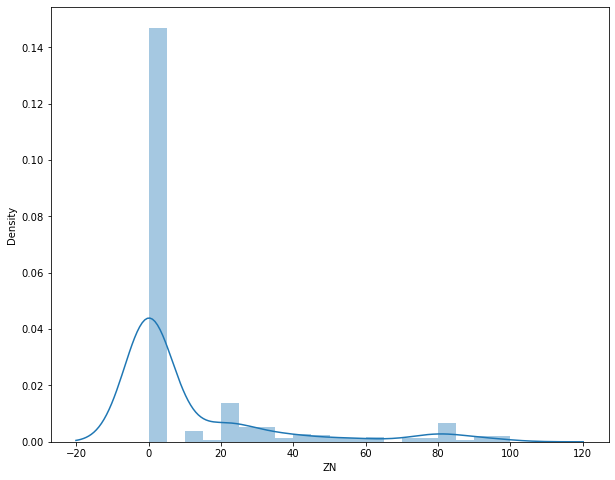

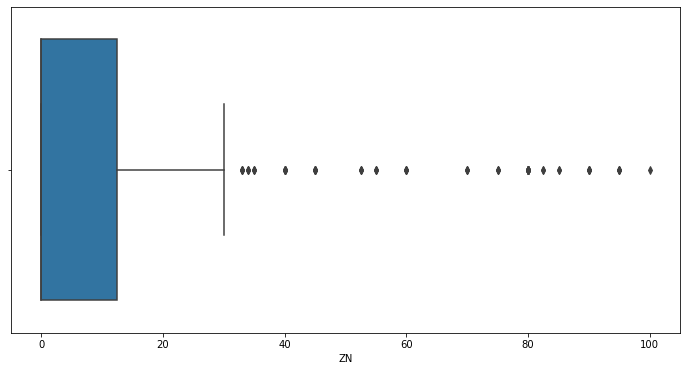

In [79]:
plt.figure(figsize=(10, 8))
sns.distplot(data['ZN'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['ZN'])

In [80]:
data[data['ZN'] == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


###### Параметр INDUS

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INDUS'>

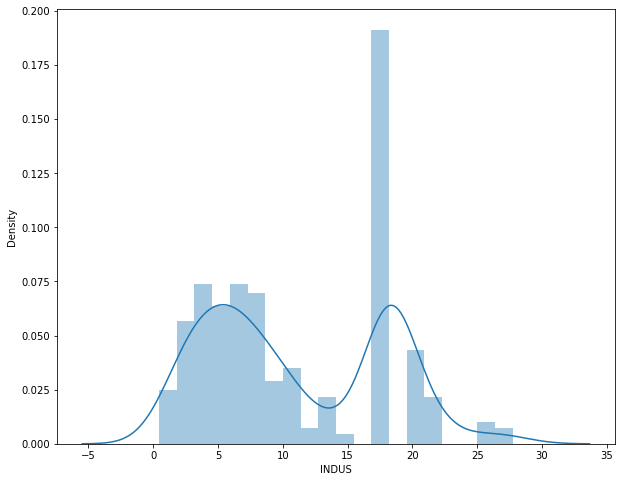

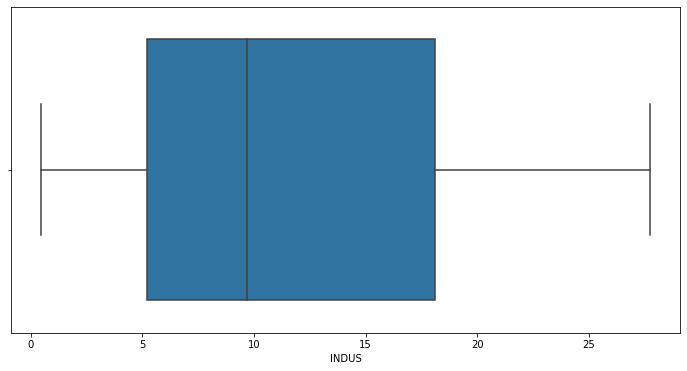

In [81]:
plt.figure(figsize=(10, 8))
sns.distplot(data['INDUS'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['INDUS'])

Заметим, что значения сосредоточены в двух диапазонах: 5-10 и 15-25. Это может означать, что в данных есть две принципиально разные группы объектов (например, центр города и окраина), для которых построение общей модели может не позволить достичь требуемой точности прогноза

###### Параметр NOX

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX'>

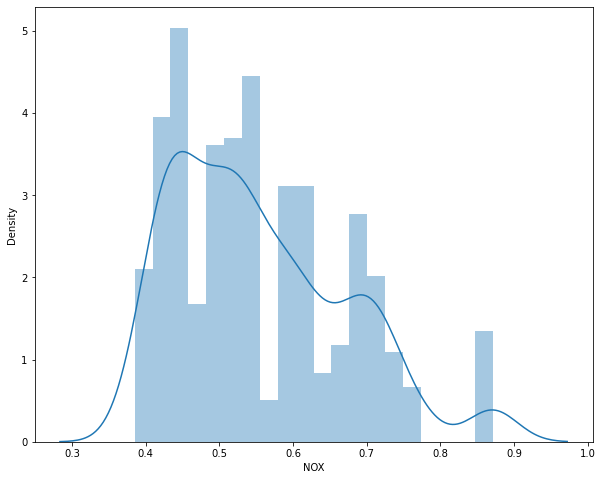

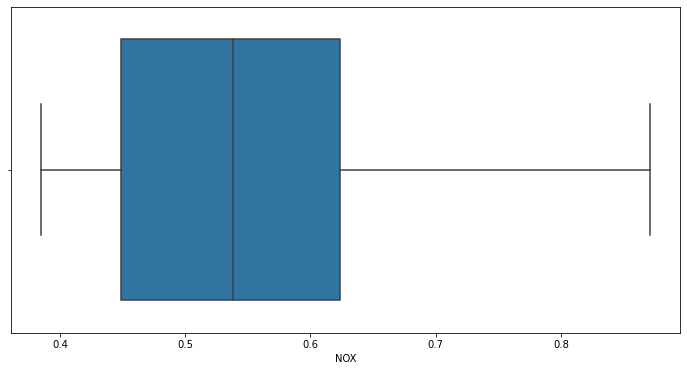

In [109]:
plt.figure(figsize=(10, 8))
sns.distplot(data['NOX'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['NOX'])

###### Параметр RM

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM'>

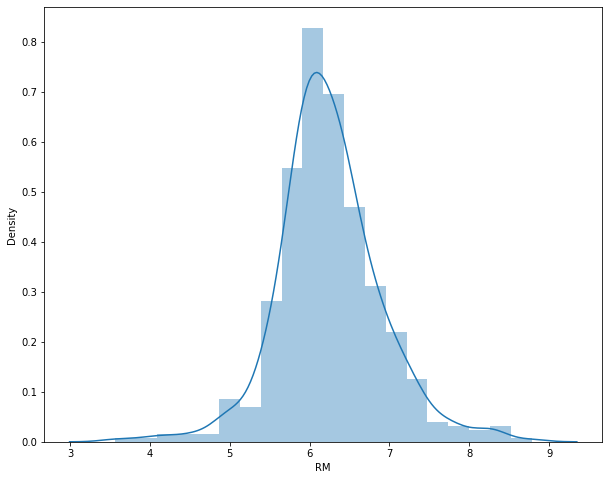

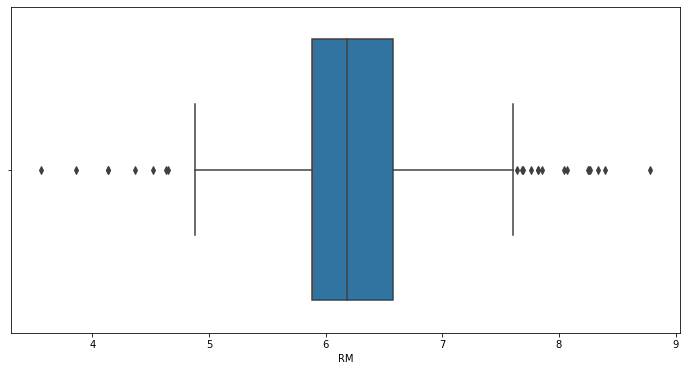

In [110]:
plt.figure(figsize=(10, 8))
sns.distplot(data['RM'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['RM'])

###### ... и так далее
В целом некорректные значения, избавление от которых позволило бы существенно улучшить модель, не были найдены

Один из интересных моментов - распределение целевого параметра MEDV

C:\Users\Peter\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV'>

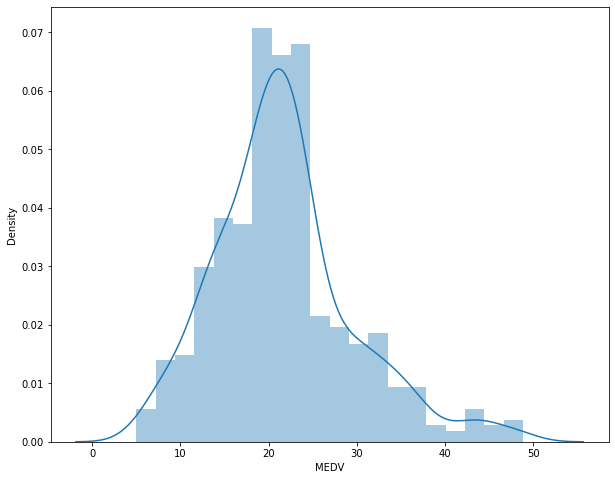

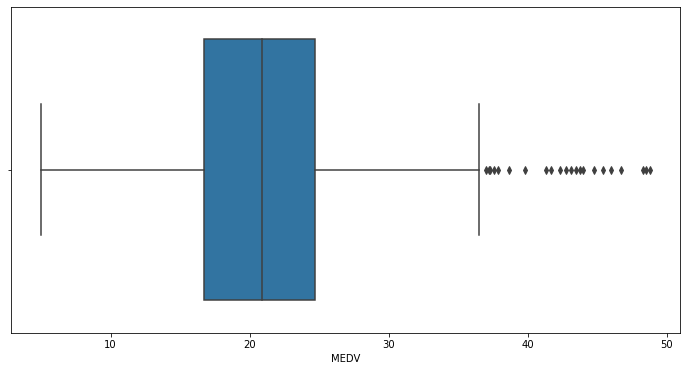

In [111]:
plt.figure(figsize=(10, 8))
sns.distplot(data['MEDV'], bins=20)

plt.figure(figsize=(12,6))
sns.boxplot(x=data['MEDV'])

In [112]:
data[data.MEDV > 49]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Есть некоторое количество записей, где MEDV равен 50.0 - кажется, что это некоторое максимальное значение,
выше которого, судя по распределению, могла подниматься цена, но была ограничена на этом уровне

Я думаю, можно убрать их, так как это может влиять на точность модели (она действительно повышается, судя по уровню ошибки)

In [113]:
data = data[data.MEDV < 50]
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


###### Далее остается только подобрать наиболее корректный набор параметров для модели

1. Можно начать только с "независимых" параметров, которые мы отобрали выше:
 - CRIM
 - ZN
 - CHAS
 - RM
 - PTRATIO
 - B
 - LSTAT

In [114]:
X = data[['CRIM','ZN','CHAS','RM','PTRATIO','B','LSTAT']]
y = data['MEDV']

reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM','ZN','CHAS','RM','PTRATIO','B','LSTAT']])

print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'

Weights: [-0.07848217  0.00452291  0.67726839  4.23951808 -0.85321302  0.0092708
 -0.41903636]
Bias: 13.271790996995328
Error: 2.9609211139217084


2. Далее - добавлять некоторые из взаимосвязанных параметров, которые могут содержать дополнительную информацию
 - INDUS
 - NOX
 - AGE
 - DIS
 - RAD
 - TAX

Кажется, нет смысла одновременно использовать параметры RAD и TAX, остальные коррелируют не так явно

In [115]:
X = data[['CRIM','ZN','CHAS','RM','PTRATIO','B','LSTAT','DIS','INDUS']]
 
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM','ZN','CHAS','RM','PTRATIO','B','LSTAT','DIS','INDUS']])

print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'

Weights: [-0.09197578  0.0288298   0.66013993  3.79706222 -0.71140019  0.00835105
 -0.41739099 -0.79920915 -0.21700081]
Bias: 18.971010906429555
Error: 2.89839215375113


После добавления DIS и INDUS ошибка несколько уменьшается

In [116]:
X = data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
 
y = data['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']])

print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'


Weights: [-7.30003757e-02  2.86904267e-02 -1.04576423e-01  8.10240515e-01
 -1.03357002e+01  4.04729186e+00 -2.76420039e-02 -1.20797447e+00
 -2.66284339e-03 -7.51440117e-01  7.11425408e-03 -3.39930512e-01]
Bias: 26.53329780978341
Error: 2.7884640796390956


Далее методом перебора результат уже не получалось улучшить


Однако можем использовать особенность распределения параметра INDUS, которую мы заметили - разделим датасет на 2 части: 

1) С высокой долей долей бизнеса, не связанного с торговлей* (INDUS > 15)

2) С низкой долей долей бизнеса, не связанного с торговлей (INDUS <= 15)

Можно предположить, что это разные части города, для каждой из которых ценообразование может строиться немного по-разному 

\* proportion of non-retail business acres per town


In [117]:
low_indus = data[data['INDUS'] <= 15]

high_indus = data[data['INDUS'] > 15]

Запустим модель для обоих этих случаев:

In [118]:
X = high_indus[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
 
y = high_indus['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(high_indus[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']])

print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'


Weights: [-1.03484506e-01 -2.59119681e-01 -4.36910249e-01  4.02143035e-01
 -1.57128725e+01 -6.84536226e-01 -2.61638128e-03  6.74188370e-02
 -6.29559180e-03 -3.99736946e-01  5.39487583e-03 -4.81766997e-01]
Bias: 59.00742497990292
Error: 2.3084147562126707


In [119]:
X = low_indus[['CRIM','INDUS','ZN','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']]
 
y = low_indus['MEDV']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(low_indus[['CRIM','INDUS','ZN','CHAS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT']])

print('Error: {}'.format(mean_absolute_error(pred_values, y)))
# 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'


Weights: [-0.18138089 -0.18269667  0.01030034  1.26396795 -0.26754321  9.09858961
 -0.07151782 -0.88144833 -0.01374703 -0.45066583  0.0129972   0.07621102]
Bias: -17.55244545640737
Error: 2.1199722233211467


Видим, что ошибка снизилась примерно на 20-25%, что говорит в пользу такого разделения